In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [10]:
boston.filename

'boston_house_prices.csv'

In [11]:
boston.data_module

'sklearn.datasets.data'

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
X = boston.data

In [6]:
y = boston.target

In [12]:
# load this in a dataframe

df = pd.DataFrame(
    X, columns=boston.feature_names
)

In [13]:
df.sample(n=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
444,12.8023,0.0,18.1,0.0,0.74,5.854,96.6,1.8956,24.0,666.0,20.2,240.52,23.79
386,24.3938,0.0,18.1,0.0,0.70,4.652,100.0,1.4672,24.0,666.0,20.2,396.90,28.28


In [14]:
df['target'] = y

                Data exploration

In [17]:
# check for null values

df.isna().sum().sum()

0

<AxesSubplot:title={'center':'Distribution of target prices'}, ylabel='Frequency'>

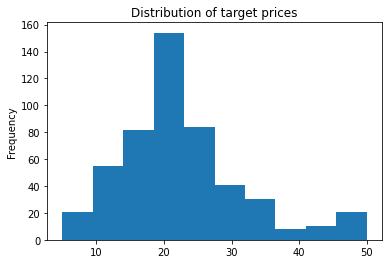

In [18]:
# understand the distribution of the target

df['target'].plot(
    title='Distribution of target prices', kind='hist'
)

        observation: 

                - The prices range between 5 and 50.

                - we can tell from the histogram that most of the prices are below 35.

In [24]:
df.groupby(['CRIM', 'NOX'], as_index=False).size().sort_values(
    by='NOX', ascending=False
)

,CRIM,NOX,size
366,2.44668,0.871,1
358,2.15505,0.871,1
346,1.41385,0.871,1
353,1.65660,0.871,1
357,2.14918,0.871,1
...,...,...,...
11,0.01538,0.394,1
71,0.04819,0.392,1
42,0.03548,0.392,1
2,0.01096,0.389,1


        Observation:  NOX -  nitric oxides concentration (parts per 10 million) occur on land 366, 358, 346

-   we can do more on data exploration

    preparing data for Machine Learning

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.25
)

    - calculate baseline

In [28]:
from sklearn.dummy import DummyRegressor

baseline = DummyRegressor()

baseline.fit(X_train, y_train)

DummyRegressor()

In [35]:
y_baseline = baseline.predict(X_test)

In [37]:
y_baseline

array([22.7348285, 22.7348285, 22.7348285, 22.7348285, 22.7348285,
       22.7348285, 22.7348285, 22.7348285, 22.7348285, 22.7348285,
       22.7348285, 22.7348285, 22.7348285, 22.7348285, 22.7348285,
       22.7348285, 22.7348285, 22.7348285, 22.7348285, 22.7348285,
       22.7348285, 22.7348285, 22.7348285, 22.7348285, 22.7348285,
       22.7348285, 22.7348285, 22.7348285, 22.7348285, 22.7348285,
       22.7348285, 22.7348285, 22.7348285, 22.7348285, 22.7348285,
       22.7348285, 22.7348285, 22.7348285, 22.7348285, 22.7348285,
       22.7348285, 22.7348285, 22.7348285, 22.7348285, 22.7348285,
       22.7348285, 22.7348285, 22.7348285, 22.7348285, 22.7348285,
       22.7348285, 22.7348285, 22.7348285, 22.7348285, 22.7348285,
       22.7348285, 22.7348285, 22.7348285, 22.7348285, 22.7348285,
       22.7348285, 22.7348285, 22.7348285, 22.7348285, 22.7348285,
       22.7348285, 22.7348285, 22.7348285, 22.7348285, 22.7348285,
       22.7348285, 22.7348285, 22.7348285, 22.7348285, 22.7348

        - we get the mean house price of 22.7.

--

                            Training the linear regressor

In [31]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = reg.predict(X_test)

    evaluate the model

In [41]:
# There are three commonly used metrics for regression: R2, MAE, and MSE

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = 0.72 vs Baseline = -0.01
MAE Regressor = 3.63 vs Baseline = 6.47
MSE Regressor = 20.61 vs Baseline = 75.44


            our model is 72% accurate

                Scaling for more meaningful coefficients

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = LinearRegression()

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

reg.fit(x_train_scaled, y_train)

y_test_pred = reg.predict(x_test_scaled)

In [62]:
# There are three commonly used metrics for regression: R2, MAE, and MSE

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test,y_test_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = 0.71 vs Baseline = -0.00
MAE Regressor = 3.60 vs Baseline = 7.09
MSE Regressor = 27.83 vs Baseline = 97.12


            with scaling we achieve 71% accuracy

--

                Adding polynomial features

In [64]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3) # To get both the quadratic and cubic feature transformation, we set the degree parameter to 3.
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)

        Fitting the linear regressor with the derived features

In [66]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False)

reg.fit(x_train_poly, y_train)

y_test_pred = reg.predict(x_test_poly)

In [67]:
# There are three commonly used metrics for regression: R2, MAE, and MSE

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test,y_test_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = -1585.06 vs Baseline = -0.00
MAE Regressor = 161.75 vs Baseline = 7.09
MSE Regressor = 153693.02 vs Baseline = 97.12


        our model performs very very very poor. Throw it in the trash.

            Regularizing the regressor

            Training the lasso regressor

In [68]:
from sklearn.linear_model import Lasso

reg = Lasso(fit_intercept=False)

reg.fit(x_train_poly, y_train)

y_test_pred = reg.predict(x_test_poly)

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e+03, tolerance: 2.189e+01
  model = cd_fast.enet_coordinate_descent(


In [69]:
# There are three commonly used metrics for regression: R2, MAE, and MSE

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test,y_test_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = 0.81 vs Baseline = -0.00
MAE Regressor = 2.82 vs Baseline = 7.09
MSE Regressor = 18.65 vs Baseline = 97.12


        our lasso regressor performs well, 81% accuracy

                Finding the optimum regularization parameter

In [70]:
from sklearn.linear_model import LassoCV

# Make a list of 50 values between 0.000001 & 1,000,000
alphas = np.logspace(-6, 6, 50)

# We will do 5-fold cross validation
reg = LassoCV(alphas=alphas, fit_intercept=False, cv=5)

reg.fit(x_train_poly, y_train)

y_train_pred = reg.predict(x_train_poly)
y_test_pred = reg.predict(x_test_poly)

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.857e+01, tolerance: 1.793e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.955e+01, tolerance: 1.793e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 

In [71]:
# There are three commonly used metrics for regression: R2, MAE, and MSE

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test,y_test_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = 0.87 vs Baseline = -0.00
MAE Regressor = 2.75 vs Baseline = 7.09
MSE Regressor = 12.39 vs Baseline = 97.12


                we achieve 87% accuracy